# Lab - Janelas

Esta mostra a visualização de janelas no domínio do tempo e da frequência, e o efeito do janelamento no sinal senoidal.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import *

1) plote no mesmo eixo as janelas retangular, triangular, hann, hamming e blackman,com 65 valores. <br>
(dica: janelas = [boxcar, bartlett, hann, hamming, blackman] é uma lista das funções janelas, e função.\__nome é uma string como nome da função )

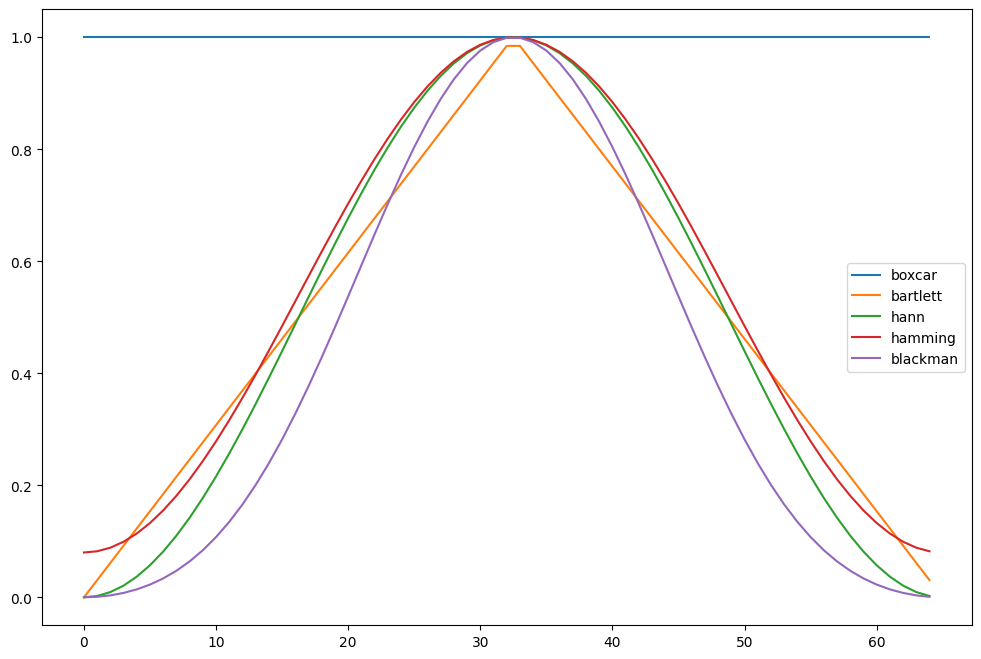

In [2]:
janelas = ['boxcar', 'bartlett', 'hann', 'hamming', 'blackman']
labels = ['boxcar', 'bartlett', 'hann', 'hamming', 'blackman']

figure(figsize=(12,8))

for i in range(5):
    plot(get_window(janelas[i], 65), label=labels[i])
legend()
show()

2) plote no mesmo eixo as transformadas de fourier das janelas retangular, triangular, hann, hamming e blackman. <br>
Considerar janelas de 16 valores, completando com zeros até 256. <br>
usar fftshift(), para ter a frequência zero no centro. <br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.


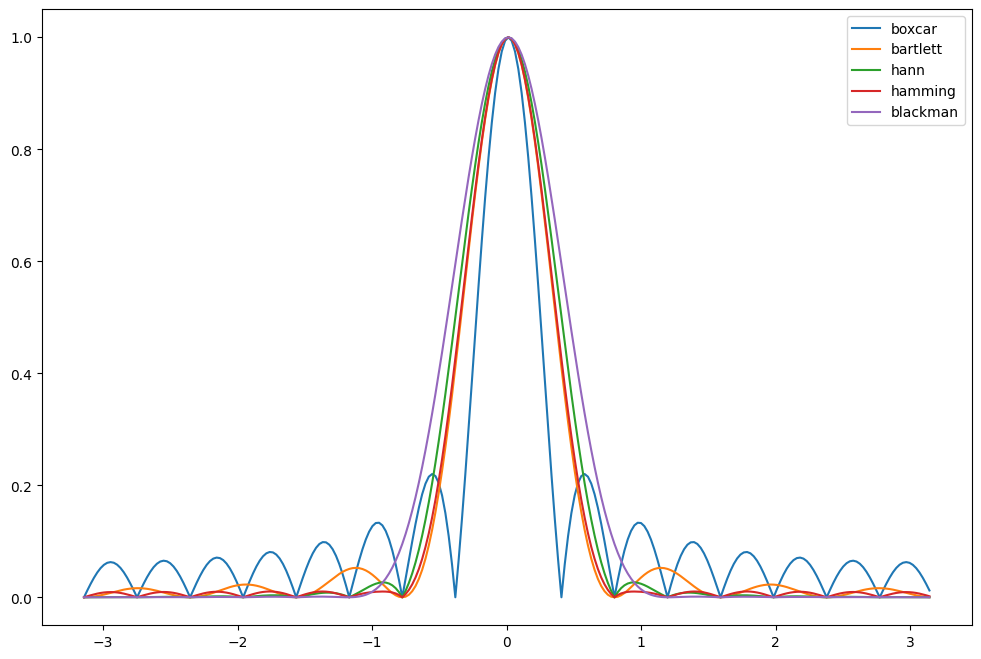

In [3]:
janelas = ['boxcar', 'bartlett', 'hann', 'hamming', 'blackman']
labels = ['boxcar', 'bartlett', 'hann', 'hamming', 'blackman']

figure(figsize=(12,8))

for i in range(5):
    x = fftshift(abs(fft(concatenate((get_window(janelas[i], 16), zeros(240))))))
    plot(linspace(-pi, pi, 256), x/max(x), label=labels[i])
legend()
show()


3) Qual dessas janelas possui espectro com menor largura do lobulo principal ? E qual dessas janelas possui menor amplitude de lóbulo lateral?


A janela Boxcar tem a menor largura do lóbulo principal e a janela Blackman tem a menor amplitude do lóbulo lateral. 

4) Plot janelas de kaiser com parametros beta=[0.1, 1, 6, 9, 12].<br>
Para comparação, plote janelas hann e blackman com simbolo 'o'.

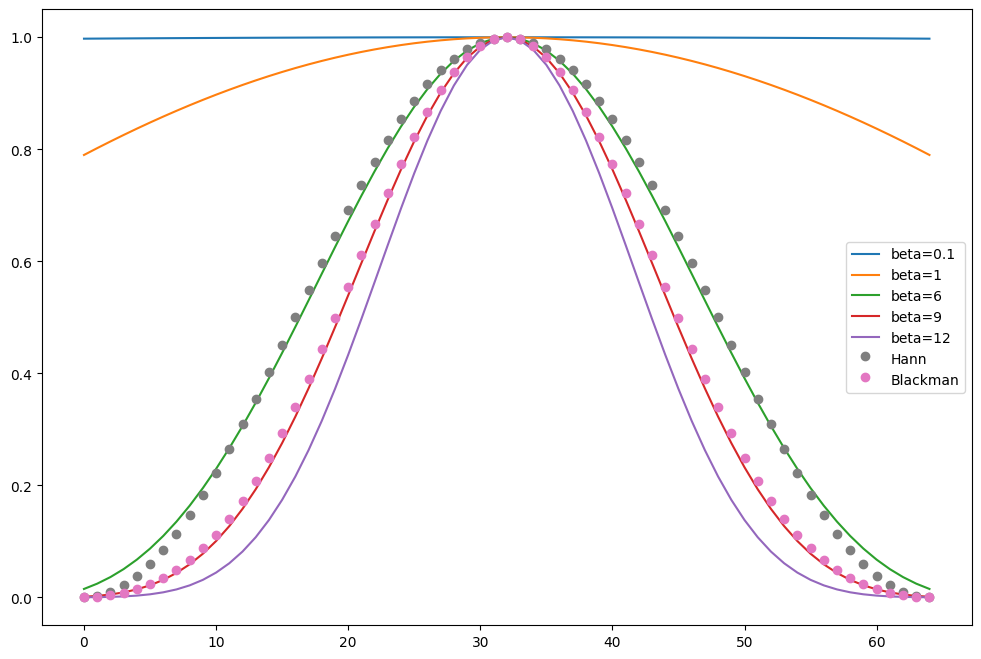

In [4]:
figure(figsize=(12,8))
beta = [0.1,1,6,9,12]
for i in range(5):
    plot(windows.kaiser(65,beta[i]),label='beta=%s'%(beta[i]))
stem(windows.hann(65),markerfmt='C7o',linefmt='none',basefmt='none',label='Hann')
stem(windows.blackman(65),markerfmt='C6o',linefmt='none',basefmt='none',label='Blackman')
legend()
show()


5) crie vetor x com 16 elementos, uma senoide com 4 ciclos.<br>

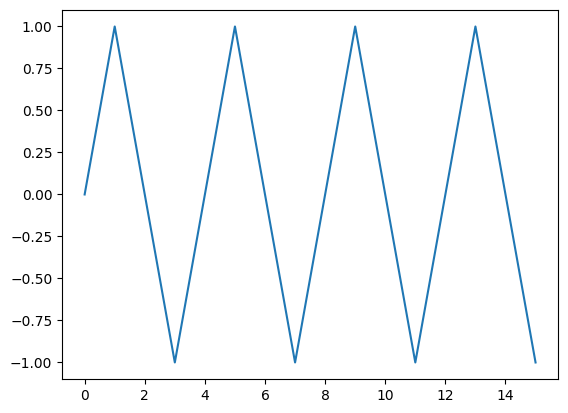

In [5]:
x = sin(4*2*pi*(linspace(0,16,16,endpoint=False))/16)
plot(x)
show()


6) crie vetor y, acrescentando 240 zeros ao vetor x. 

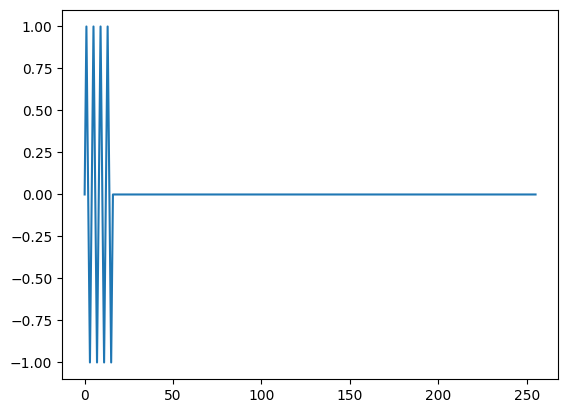

In [6]:
y = concatenate((x,zeros(240)))
plot(y)
show()

7) crie vetor z com 256 elementos, uma senoide com a mesma frequência. <br>

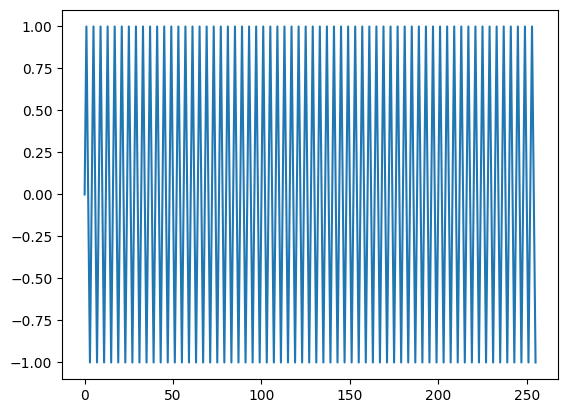

In [7]:
z = sin(64*2*pi*(linspace(0,256,256,endpoint=False))/256)
plot(z)
show()

8) plote no mesmo eixo os espectros dos tres sinais.<br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.

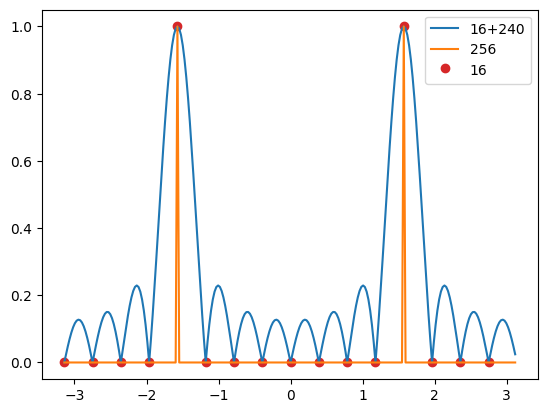

In [8]:
fx = abs(fft(x))
fy = abs(fft(y))
fz = abs(fft(z))

stem(linspace(-pi,pi,16,endpoint=False),fftshift(fx/max(fx)),markerfmt='C3o',linefmt='none',basefmt='none',label='16')
plot(linspace(-pi,pi,256,endpoint=False),fftshift(fy/max(fy)),label='16+240')
plot(linspace(-pi,pi,256,endpoint=False),fftshift(fz/max(fz)),label='256')
legend()
show()


A partir da resposta em frequência obtida é possível notar a ocorrência do vazamento. Ao aplicar o método de janelamento a componente em uma frequência "vaza" nas componentes vizinhos devido ao espalhamento espectral causado pela janela.

9) Obter o sinal zz multiplicando o sinal z por uma janela de hann de tamanho 16.

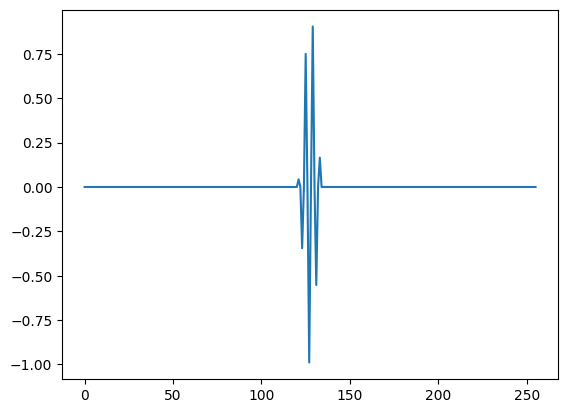

In [9]:
zz = z * concatenate((zeros(120), windows.hann(16), zeros(120)))
plot(zz)
show()

10) Plote no mesmo eixo os espectros dos tres sinais do item 8) e o espectro de zz.<br>
Dividir os valores pelo máximo de cada janela, para possibilitar a comparação dos valores normalizados entre 0 e 1.

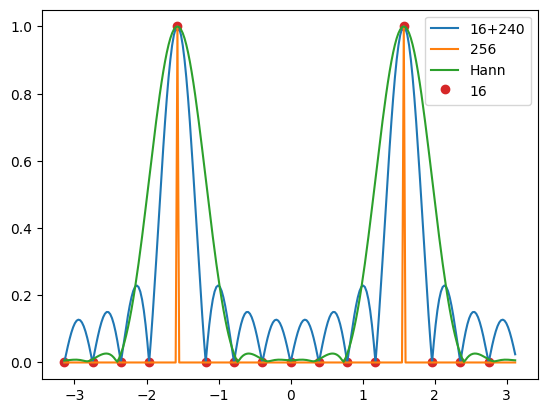

In [10]:
fx = abs(fft(x))
fy = abs(fft(y))
fz = abs(fft(z))
fzz = abs(fft(zz))

stem(linspace(-pi,pi,16,endpoint=False),fftshift(fx/max(fx)),markerfmt='C3o',linefmt='none',basefmt='none',label='16')
plot(linspace(-pi,pi,256,endpoint=False),fftshift(fy/max(fy)),label='16+240')
plot(linspace(-pi,pi,256,endpoint=False),fftshift(fz/max(fz)),label='256')
plot(linspace(-pi,pi,256,endpoint=False),fzz/max(fzz),label='Hann')
legend()
show()